In [1]:
import io
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from sklearn.metrics import confusion_matrix


In [2]:
results = [[48032, 4776],[35,1876]]
cf_matrix = np.array((results))


<AxesSubplot:>

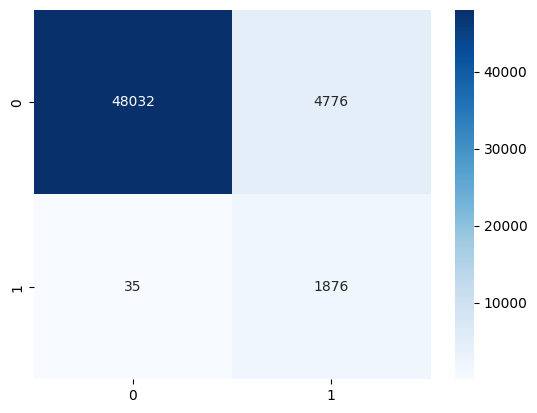

In [3]:
sns.heatmap(cf_matrix, annot=True, fmt="", cmap="Blues")

<AxesSubplot:>

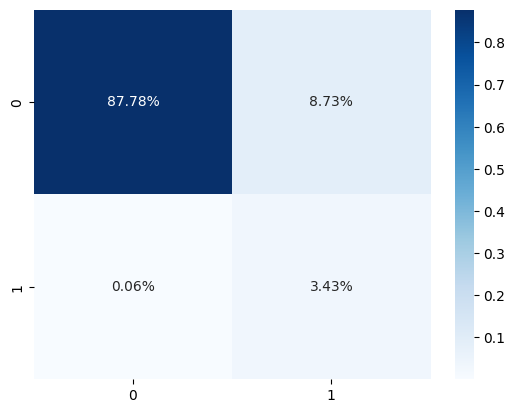

In [4]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Code for figure with precentage included

[Text(0, 0.5, 'Not capitalized'), Text(0, 1.5, 'Capitalized')]

<Figure size 1500x1500 with 0 Axes>

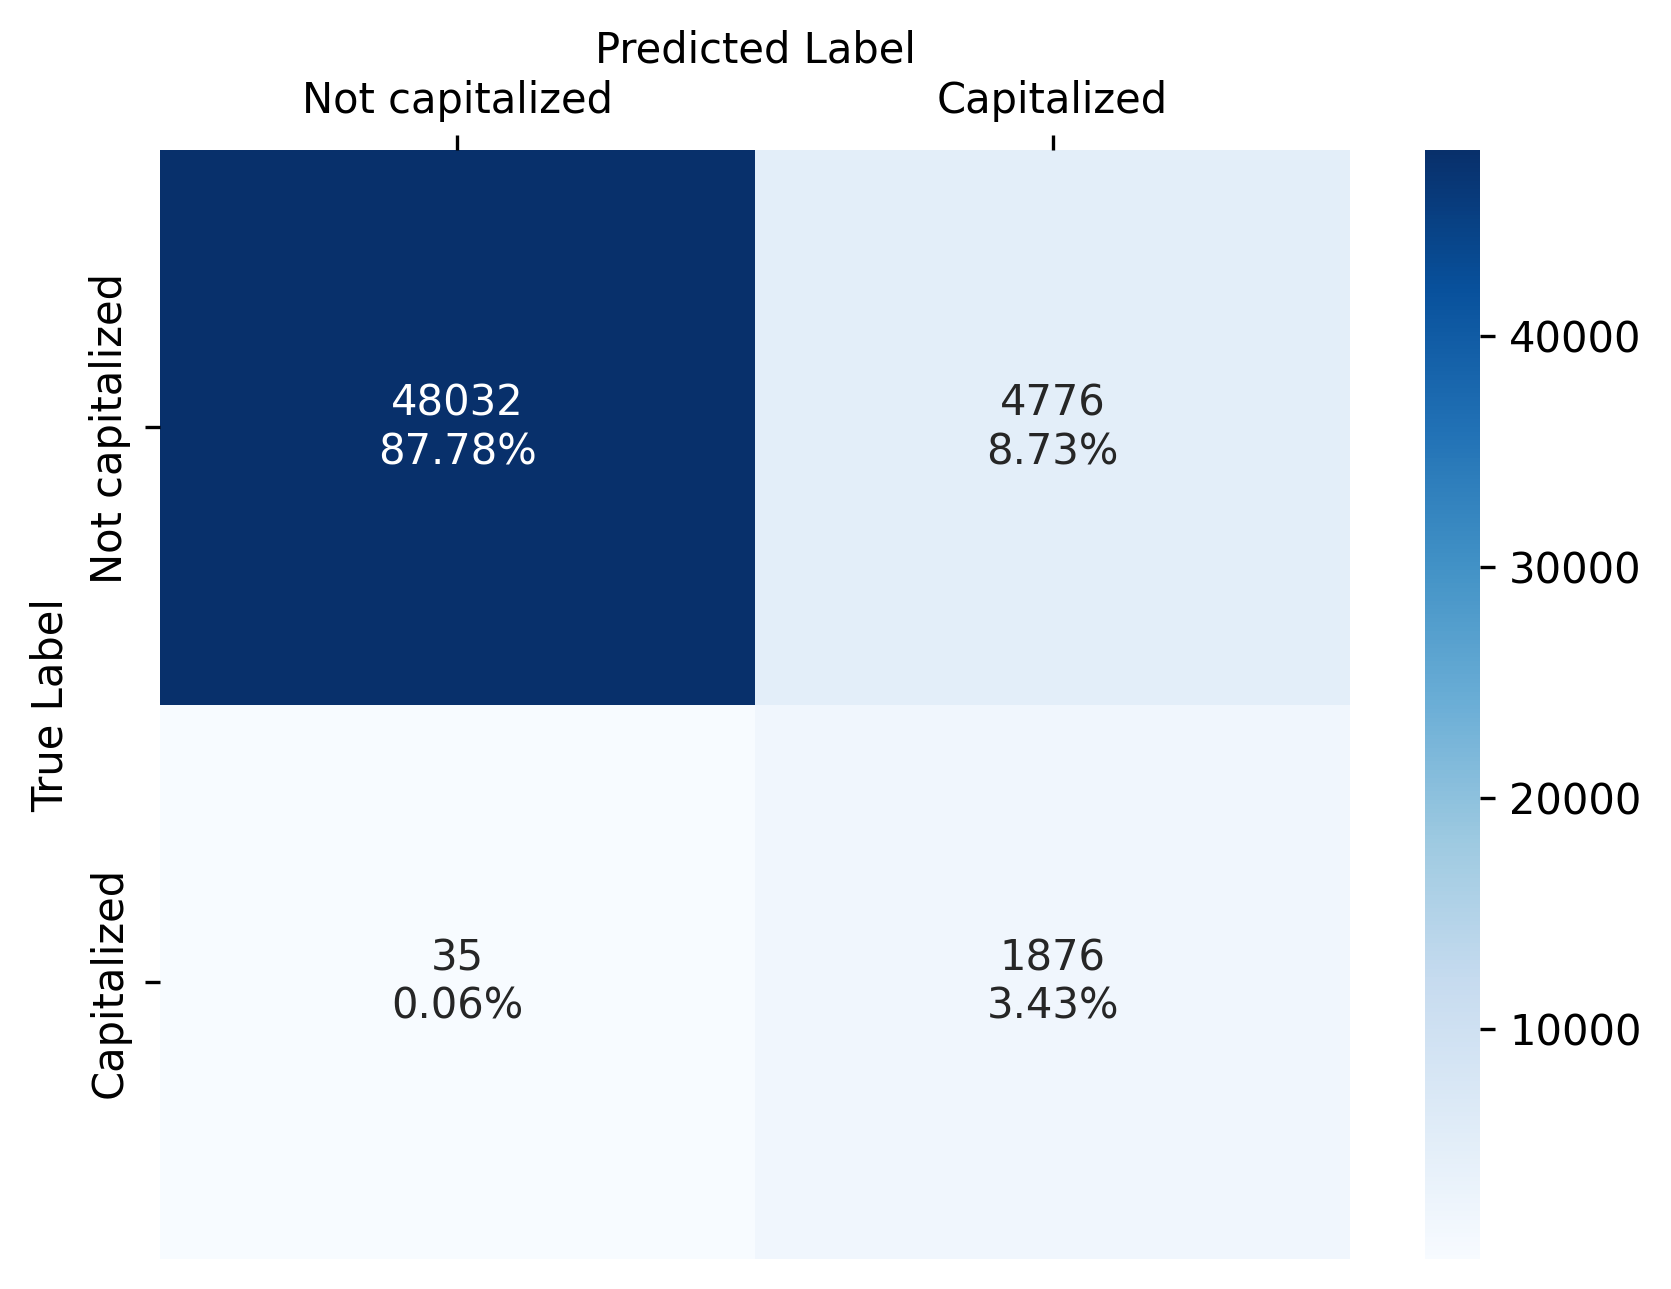

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15)) 

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix)) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

fig, ax = plt.subplots(dpi=300)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=0)
ax.set_yticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=90)


# Code for figure with WITHOUIT precentage included

[Text(0, 0.5, 'Not capitalized'), Text(0, 1.5, 'Capitalized')]

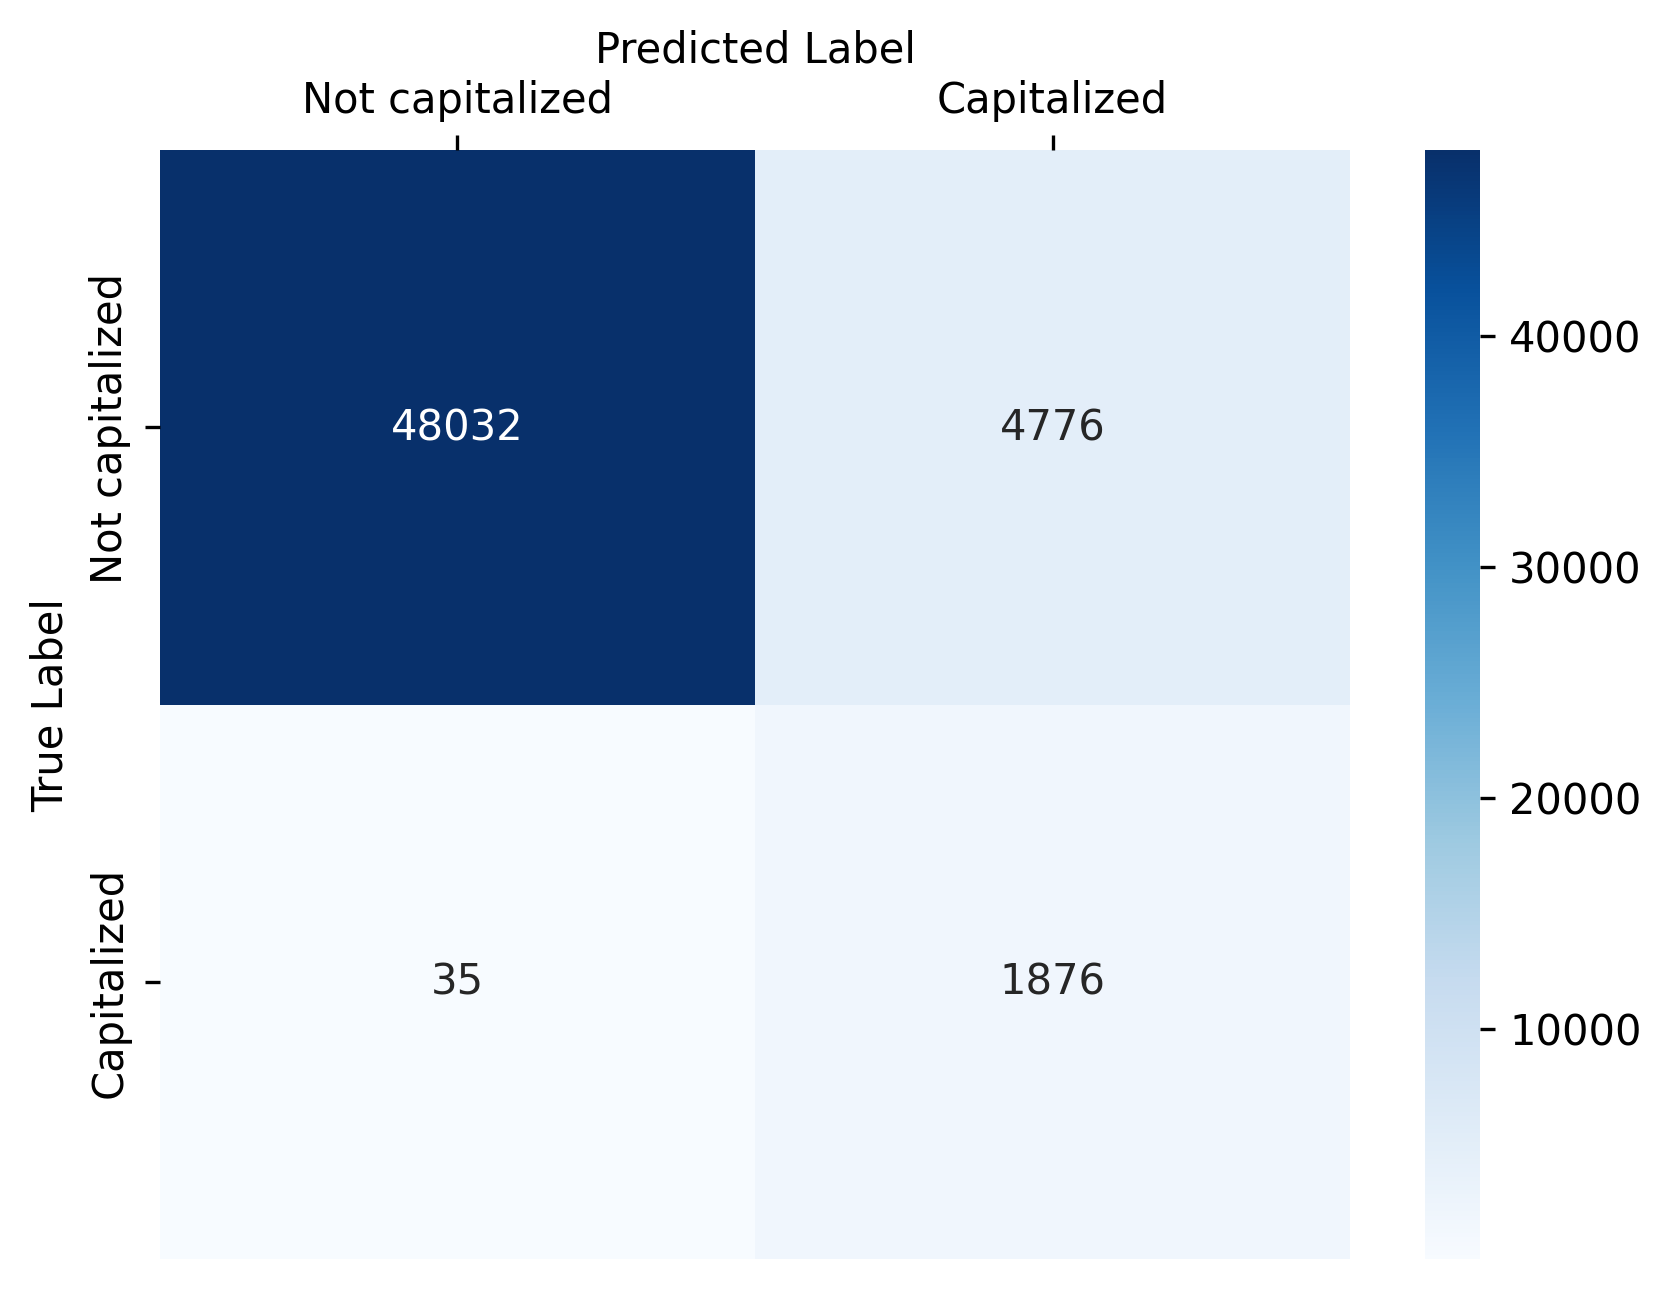

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v}" for v in group_counts]
labels = np.asarray(labels).reshape(2, 2)

fig, ax = plt.subplots(dpi=300)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=0)
ax.set_yticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=90)


In [ ]:
""" Parl Corpus matrix """

[Text(0, 0.5, 'Not capitalized'), Text(0, 1.5, 'Capitalized')]

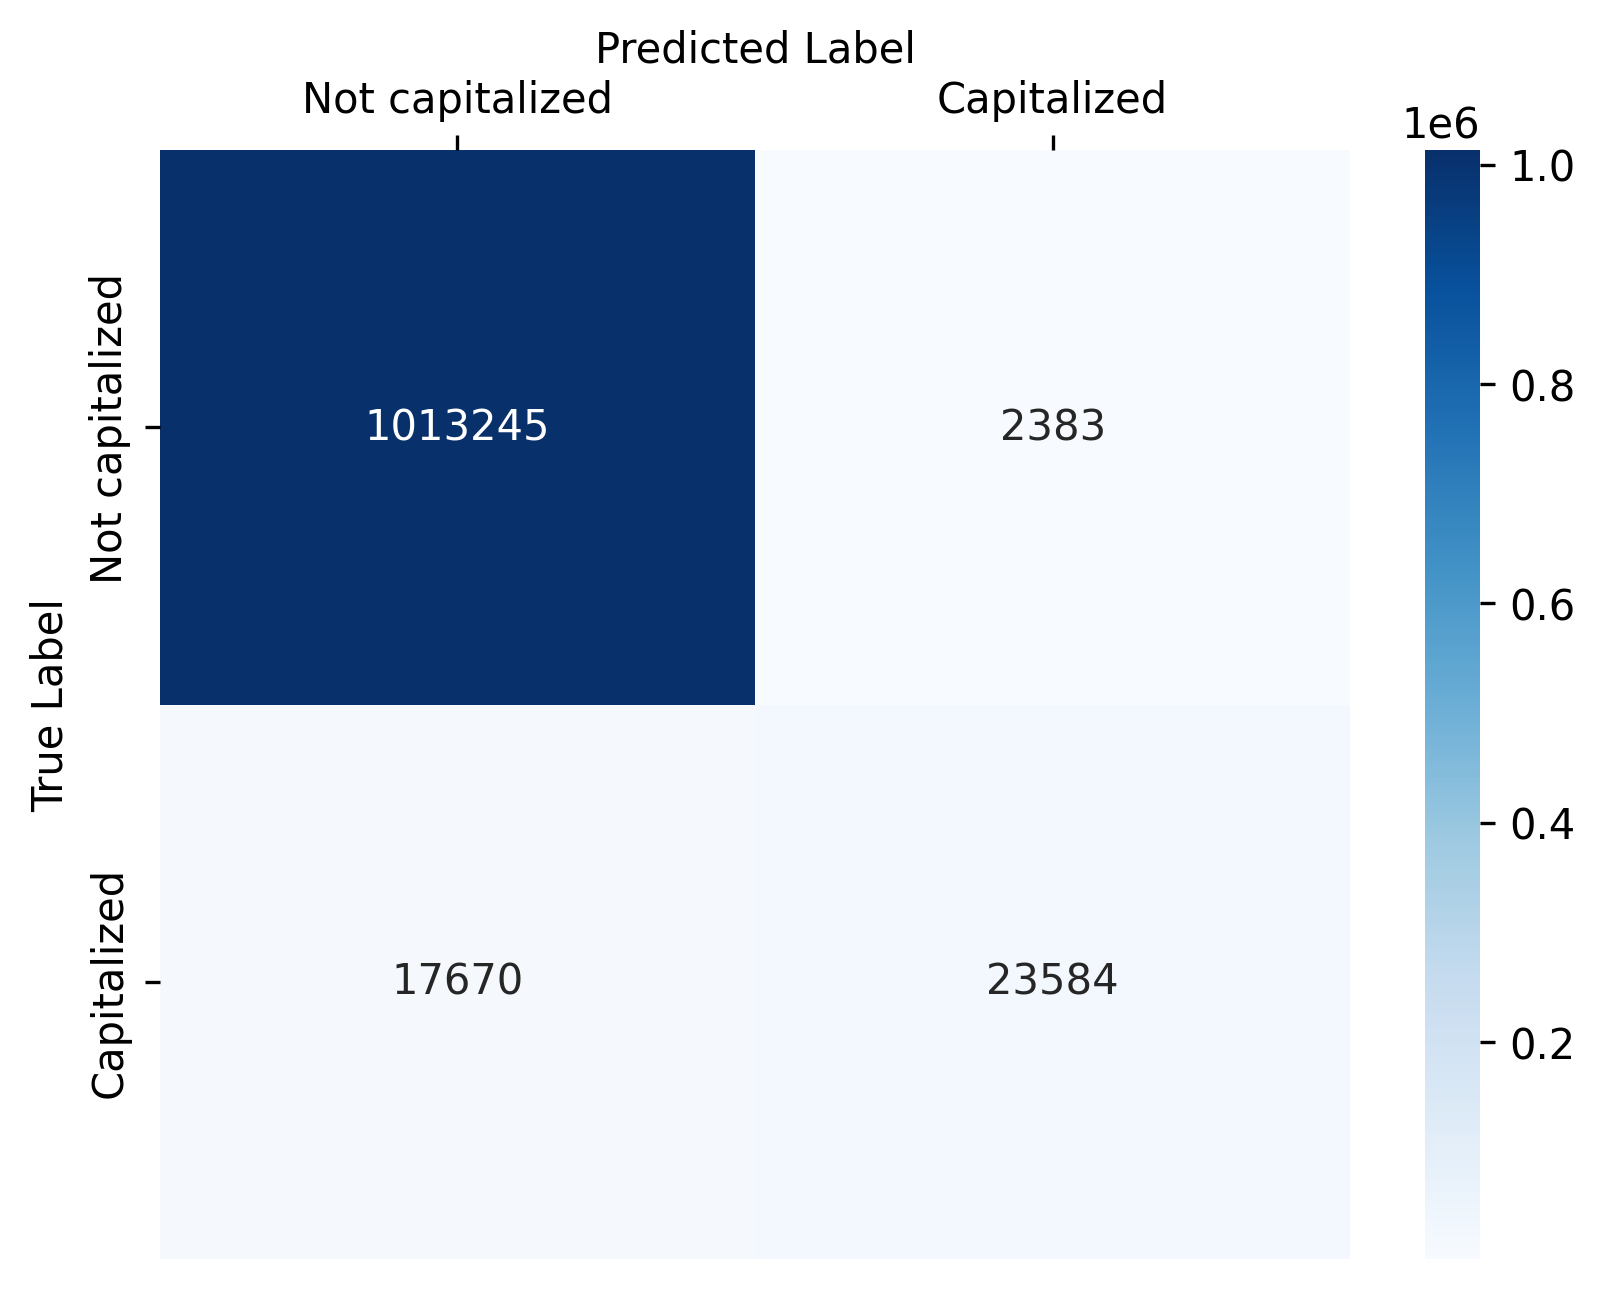

In [76]:
parl_results = np.array([[1013245, 2383],[17670,23584]])

group_counts = ["{0:0.0f}".format(value) for value in parl_results.flatten()]
labels = [f"{v}" for v in group_counts]
labels = np.asarray(labels).reshape(2, 2)

fig, ax = plt.subplots(dpi=300)
sns.heatmap(parl_results, annot=labels, fmt='', cmap='Blues', ax=ax)

ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=0)
ax.set_yticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=90)

In [12]:
df = pd.read_csv("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/NCRFpp/norne_cf_df_binary")

In [20]:
import csv

r = []
with open("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/NCRFpp/norne_cf_df_binary", "r") as file:
    results = csv.reader(file, delimiter=",")
    for row in results:
        r.append(row)

In [21]:
r

[['', '0', '1'], ['0', '50955', '316'], ['1', '1895', '1573']]

In [70]:
def read_binary_matrix_csv(file_name):
    rows = []
    with open(file_name) as file:
        results = csv.reader(file, delimiter=",")
        for i, row in enumerate(results):
            if i != 0:
                rows.append(row)
    
    rows[0].pop(0)
    rows[1].pop(0)
    return np.array(rows, dtype=int)

In [89]:
def create_confusion_matrix(array):
    group_counts = ["{0:0.0f}".format(value) for value in array.flatten()]
    labels = [f"{v}" for v in group_counts]
    group_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix)) for value in cf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fig, ax = plt.subplots(dpi=300)
    sns.heatmap(array, annot=labels, fmt='', cmap='Blues', ax=ax)

    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=0)
    ax.set_yticklabels(labels=[ "Not capitalized", "Capitalized"], rotation=90)
    

In [90]:
file = "/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/NCRFpp/norne_cf_df_binary"
rows = read_binary_matrix_csv(file)

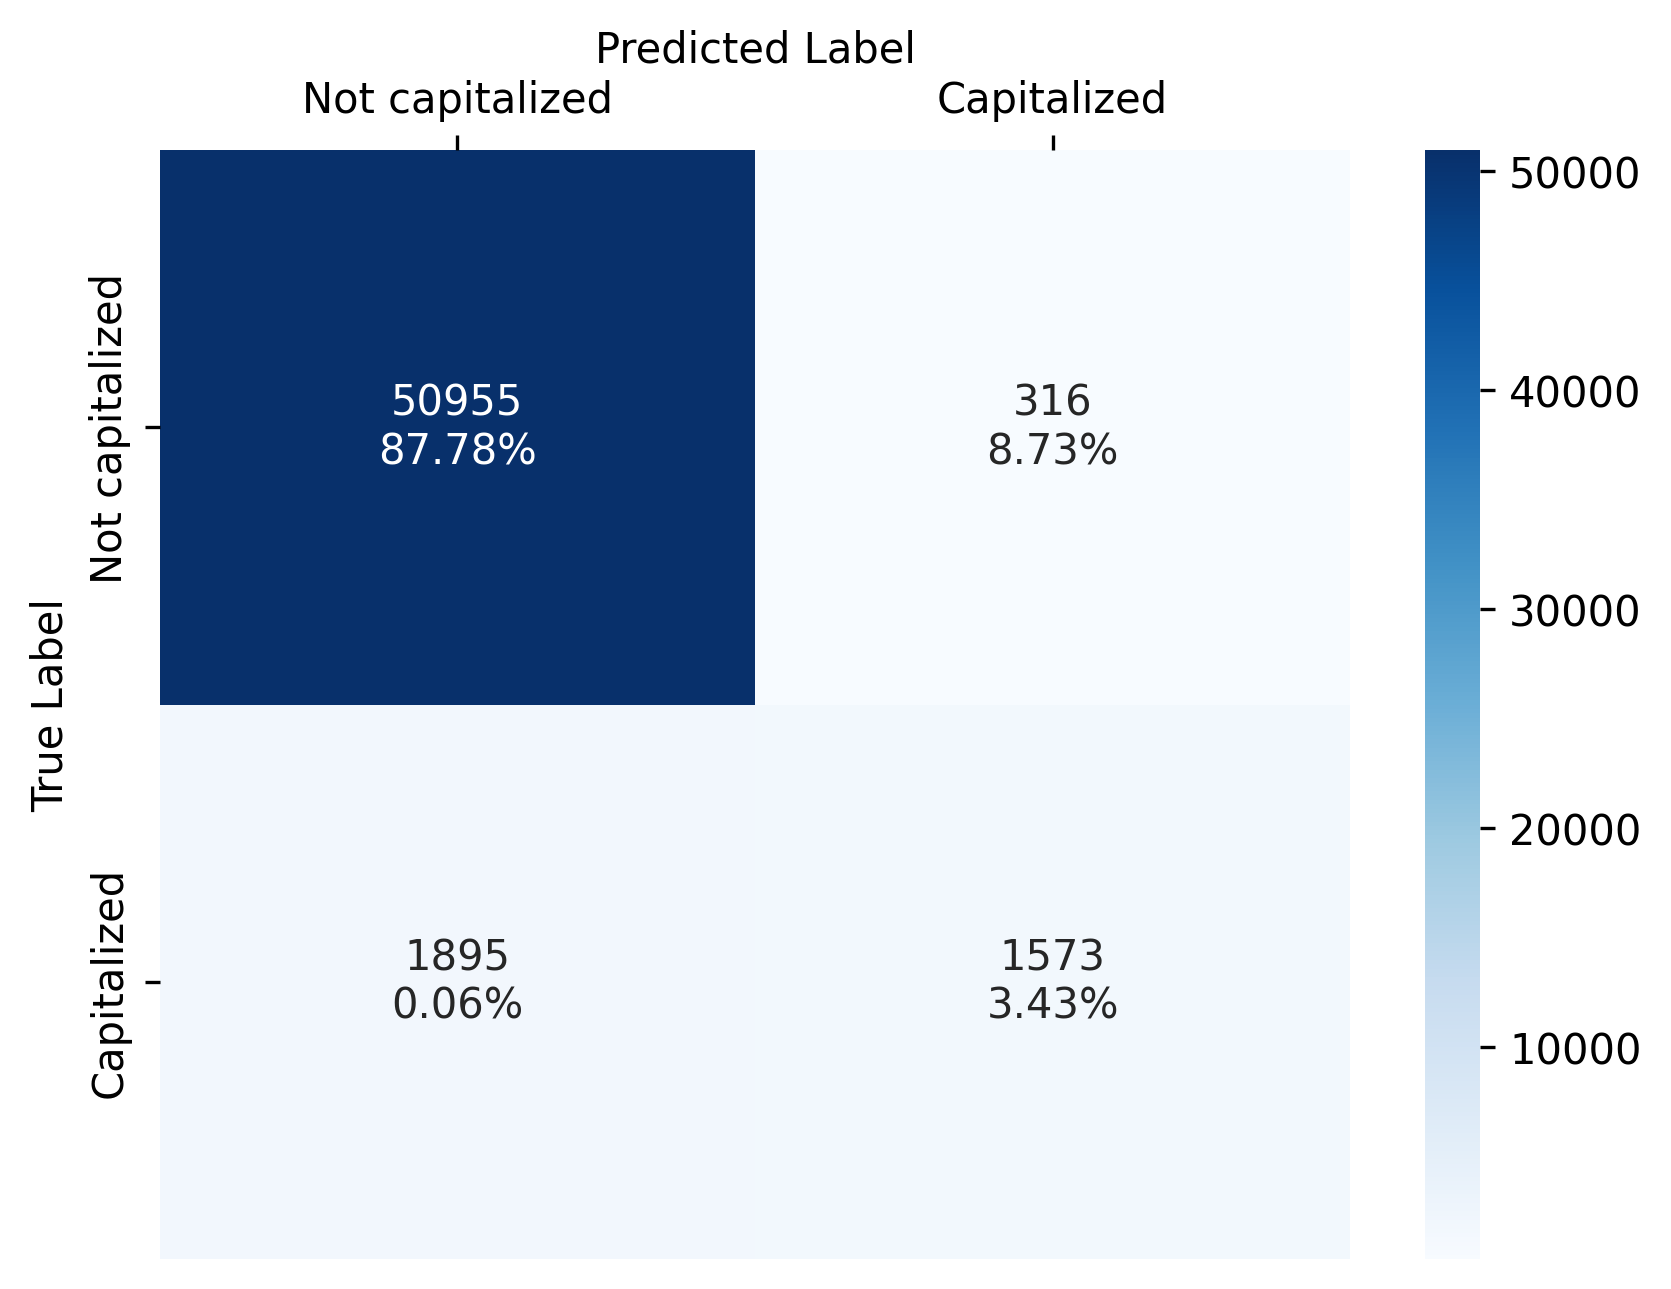

In [91]:
create_confusion_matrix(rows)

In [96]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
   

In [100]:
sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


plot_classification_report(sampleClassificationReport)
plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

[0.62, 1.0, 0.76]
[0.93, 0.93, 0.93]
[0.59, 0.97, 0.73]
[0.47, 0.92, 0.62]
[1.0, 0.16, 0.28]
plotMat: [[0.62, 1.0, 0.76], [0.93, 0.93, 0.93], [0.59, 0.97, 0.73], [0.47, 0.92, 0.62], [1.0, 0.16, 0.28]]
support: [66, 40, 67, 272, 413]
